In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import sklearn
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.linear_model import LogisticRegression

In [2]:
sentences = pd.read_csv('~/Documents/UC Berkeley/Stat198/imdb_data.csv')
sentences.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
sentences.head()

,Review,Score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
len(sentences)

1000

In [5]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
tokens = nltk.word_tokenize(sentences['Review'][0])
tokens

['A',
 'very',
 ',',
 'very',
 ',',
 'very',
 'slow-moving',
 ',',
 'aimless',
 'movie',
 'about',
 'a',
 'distressed',
 ',',
 'drifting',
 'young',
 'man',
 '.']

In [6]:
vectorizer = CountVectorizer(min_df=1)

In [8]:
reviews = sentences['Review']

In [9]:
reviews

0      A very, very, very slow-moving, aimless movie ...
1      Not sure who was more lost - the flat characte...
2      Attempting artiness with black & white and cle...
3           Very little music or anything to speak of.  
4      The best scene in the movie was when Gerardo i...
5      The rest of the movie lacks art, charm, meanin...
6                                    Wasted two hours.  
7      Saw the movie today and thought it was a good ...
8                                   A bit predictable.  
9      Loved the casting of Jimmy Buffet as the scien...
10                  And those baby owls were adorable.  
11     The movie showed a lot of Florida at it's best...
12     The Songs Were The Best And The Muppets Were S...
13                                     It Was So Cool.  
14     This is a very "right on case" movie that deli...
15     It had some average acting from the main perso...
16     This review is long overdue, since I consider ...
17     I'll put this gem up aga

In [10]:
X = vectorizer.fit_transform(test)

In [19]:
X_train = X[:500, :]
X_train.shape

(500, 3047)

In [20]:
analyze = vectorizer.build_analyzer()

In [21]:
vectorizer.get_feature_names()

['10',
 '12',
 '13',
 '15',
 '15pm',
 '17',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2005',
 '2006',
 '20th',
 '25',
 '30',
 '40',
 '50',
 '54',
 '70',
 '70000',
 '70s',
 '80',
 '80s',
 '8pm',
 '90',
 '95',
 'aailiyah',
 'abandoned',
 'ability',
 'about',
 'above',
 'abroad',
 'absolutely',
 'abstruse',
 'abysmal',
 'academy',
 'accents',
 'accessible',
 'acclaimed',
 'accolades',
 'accurate',
 'accurately',
 'accused',
 'achievement',
 'achille',
 'ackerman',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'actor',
 'actors',
 'actress',
 'actresses',
 'actually',
 'adams',
 'adaptation',
 'add',
 'added',
 'addition',
 'admins',
 'admiration',
 'admitted',
 'adorable',
 'adrift',
 'adventure',
 'advise',
 'aerial',
 'aesthetically',
 'affected',
 'affleck',
 'afraid',
 'africa',
 'after',
 'afternoon',
 'again',
 'against',
 'age',
 'aged',
 'ages',
 'ago',
 'agree',
 'agreed',
 'aimless',
 'air',
 'aired',
 'aka

In [22]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
testdf = pd.DataFrame()

In [24]:
testdf['bow'] = [X.toarray()[i] for i in range(len(X.toarray()))]

In [25]:
testdf['score'] = sentences['Score']

In [26]:
testdf

,bow,score
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
9,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


In [39]:
y_train = testdf['score'][:500]

In [40]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
testdf['score_pred_class'] = logreg.predict(X)

In [42]:
testdf.tail()

,bow,score,score_pred_class
995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1
996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0
997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1
998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0
999,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0


In [45]:
testdf['score_pred_prob'] = logreg.predict_proba(X)[:,1]

In [46]:
testdf.head()

,bow,score,score_pred_class,score_pred_prob
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,7.538990e-08
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,3.435041e-06
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,4.165243e-05
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,2.797354e-05
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,9.999878e-01


In [63]:
testdf['correct_pred'] = (testdf['score'] == testdf['score_pred_class'])
testdf['num_features'] = [sum(testdf['bow'][i]) for i in range(len(testdf))]

In [64]:
sum(testdf['bow'][999])
testdf.tail()

,bow,score,score_pred_class,score_pred_prob,correct_pred,num_features
995,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0.846053,False,10
996,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0.332835,True,13
997,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,0.551476,False,5
998,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0.000042,True,2
999,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0.436519,True,14


In [52]:
testdf.tail(10)
sum(testdf['correct_pred']) - 500
all(testdf['score'][:500]) == all(testdf['score_pred_class'][:500]) # all true because this is the training data

True

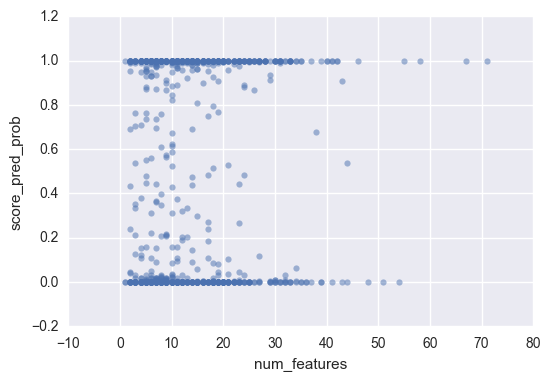

In [77]:
sns.regplot(x='num_features',y='score_pred_prob',data=testdf,fit_reg=False,scatter_kws={'alpha':0.5})

In [78]:
class_rate = (sum(testdf['correct_pred'])-500)/500
class_rate

0.73799999999999999